# THE SPARKS FOUNDATION

## Data Science & Business Analytics Intern [GRIP FEB'21]

**Name:-** Karthikeyan .M.J

- LinkedIn : https://www.linkedin.com/in/karthikeyan-jagadeesan27/

- GitHub profile : https://github.com/Karthikeyan-MJ

**Task-5 >>**
- Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’
- As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.
- Suggest teams or players a company should endorse for its products.

# Imporing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Dataset

In [2]:
df=pd.read_csv('matches.csv')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
df.shape

(756, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
df.columns.values

array(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'], dtype=object)

In [6]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [7]:
# there are more null values present in feature 'umpire 3', So dropping this feature..
df = df.drop('umpire3',axis=1) 

In [8]:
df.describe()


,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [9]:
print("Number of Seasons played:", len(df['season'].unique()))

Number of Seasons played: 12


In [10]:
print("No. of Matches Played")
df['season'].value_counts()

No. of Matches Played


2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

# Visualization

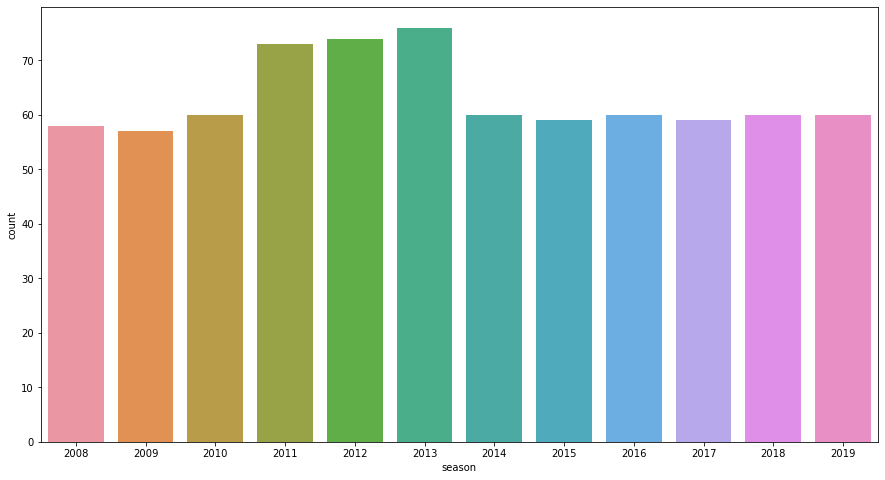

In [11]:
plt.figure(figsize=(15,8))
sns.countplot(x='season', data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

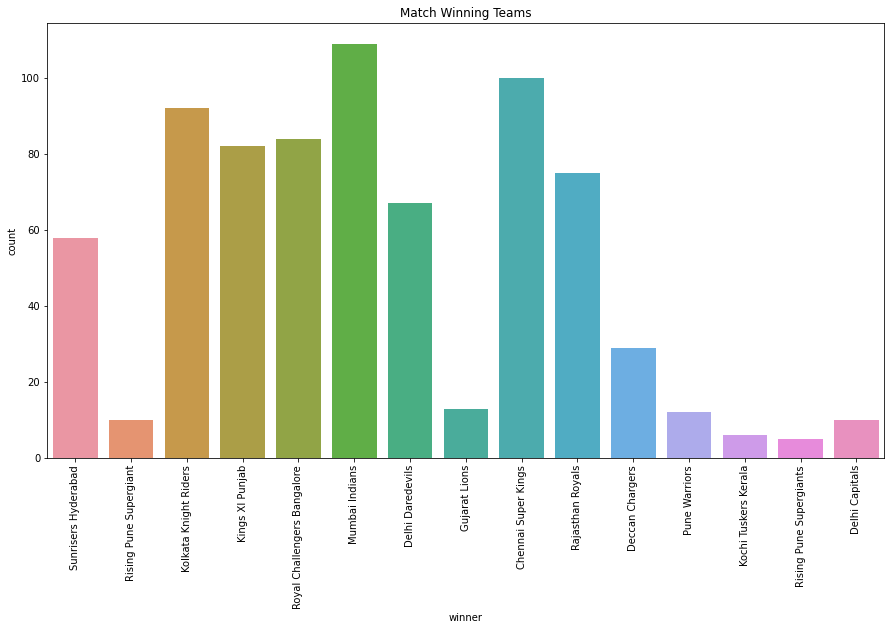

In [12]:
plt.figure(figsize=(15,8))
sns.countplot(x='winner', data=df)
plt.title('Match Winning Teams')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

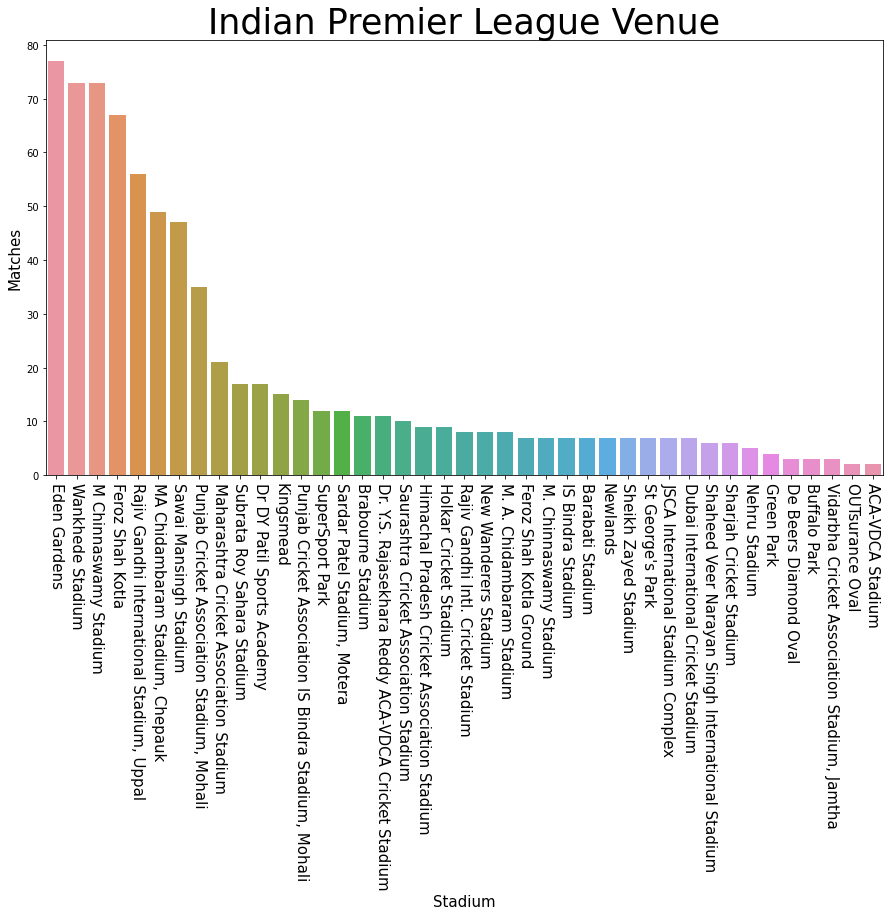

In [13]:
plt.subplots(figsize=(15,8))
sns.countplot(x ='venue',data=df,order=df['venue'].value_counts().index)
plt.title('Indian Premier League Venue',fontsize=35)
plt.xlabel('Stadium',fontsize=15)
plt.ylabel('Matches',fontsize=15)
plt.xticks(rotation=-90,fontsize=15)

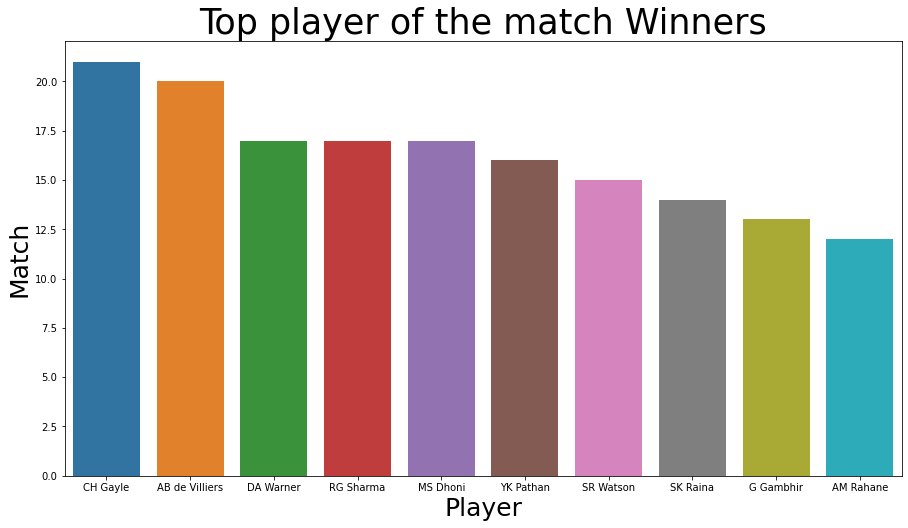

In [14]:
plt.figure(figsize=(15,8))
sns.barplot(x= df.player_of_match.value_counts()[:10].index,y= df.player_of_match.value_counts()[:10])
plt.title('Top player of the match Winners',fontsize=35)
plt.xlabel('Player',fontsize=25)
plt.ylabel('Match',fontsize=25)
plt.show()

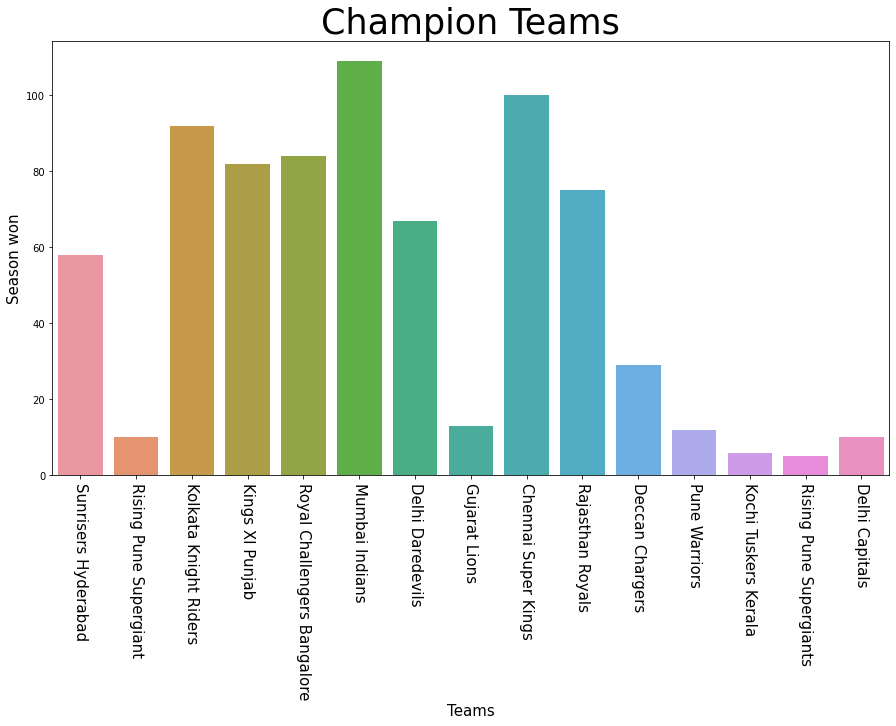

In [15]:
plt.figure(figsize=(15,8))
sns.countplot('winner', data = df)
plt.title('Champion Teams',fontsize=35)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Season won',fontsize=15)
plt.xticks(rotation=-90,fontsize=15)
plt.show()

**INFERENCE :-**
- Mumbai Indians plays the highest amount of matches and has won more seasons than the other teams Chennai Super Kings ranked the second highest in winning matches followed by Kolkata Knight Riders Eden Gardens hosts the highest number of matches followed by M Chinnaswamy Stadium and Wankhede Stadium CH Gayle won the most MVP awards in Indian Premier League